# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
now = datetime.datetime.now()
todaysdate = now.strftime("%m-%d-%Y")


# Dependencies
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

576

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
##setup the lists i will use to store the values for each city into a list that i will put into a dataframe for charting 
lat = []
lng = []
nl = "\n"
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []  
##Created a append method to add all the values of intrest for the city to the appropriate list
def toappend(ct,cd,co,dt,hu,la,ln,mt,ws):
    City.append(ct)
    Cloudiness.append(cd)
    Country.append(co)
    Date.append(dt)
    Humidity.append(hu)
    Lat.append(la)
    Lng.append(ln)
    Max_Temp.append(mt)
    Wind_Speed.append(ws)

#Method to parse the value of intrest    
def parseinformation(response):
    #using Try and except to catch all the bad Valid [200] responses
    try:
        city_name = response["name"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp"]
        wind_speed = response["wind"]["speed"]
        appendvalues = [city_name,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed]
        toappend(*appendvalues)
        print(f"Processing {city_name}: {nl} cloudiness: {cloudiness},{nl} country: {country},date: {date}, humidity {humidity}, lat: {lat}, lng: {lng},wind speed: {wind_speed}, max temp {max_temp}  ")
    except KeyError:
        skipped
        return "Not Found"
        print("City Not Found, Skipping..")
        pass
    

#Loop to do the API query to the owm server
counter = 0
print(f"Len of City is is {len(cities)}")
skipped = 0
for city in cities:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + api_key + "&q=" + str(city)
        params = {"appid": api_key, "q": city}
        response = requests.get(query_url, params=params)
        response = response.json()
        status = parseinformation(response)
        print(f"{city} is index {counter} out of {len(cities)} of cities. {len(cities)-counter} cities left to go.")
        if status == "Not Found":
            skipped += 1
            print(f"City {city}: Not Found")
        counter += 1
#         if counter > 20:
#             break


#load all the list data into a dataframe
listtoadd = [City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed]
city_weather_data = pd.DataFrame(listtoadd)
city_weather_data = city_weather_data.T
#rename columns
city_weather_data = city_weather_data.rename(columns={0:"City",
                                                     1:"Cloudiness",
                                                     2:"Country",
                                                     3:"Date",
                                                     4:"Humidity",
                                                     5:"Lat",
                                                     6:"Lng",
                                                     7:"Max Temp",
                                                     8:"Wind Speed",})

print(f"Total Number of Cities: {len(cities)} Numbers of Cities Parsed: {counter-skipped} Skipped Cities: {skipped} ")
# city_weather_data

Len of City is is 576
Processing Hilo: 
 cloudiness: 75,
 country: US,date: 1541984160, humidity 64, lat: 19.71, lng: -155.08,wind speed: 5.1, max temp 295.97  
hilo is index 0 out of 576 of cities. 576 cities left to go.
Processing Pucara: 
 cloudiness: 40,
 country: BO,date: 1541984400, humidity 73, lat: -21.7, lng: -64.2,wind speed: 0.78, max temp 295.15  
pucara is index 1 out of 576 of cities. 575 cities left to go.
Processing Kapaa: 
 cloudiness: 90,
 country: US,date: 1541984160, humidity 47, lat: 22.08, lng: -159.32,wind speed: 6.7, max temp 299.84  
kapaa is index 2 out of 576 of cities. 574 cities left to go.
Processing Kodiak: 
 cloudiness: 90,
 country: US,date: 1541980380, humidity 75, lat: 39.95, lng: -94.76,wind speed: 1.5, max temp 277.05  
kodiak is index 3 out of 576 of cities. 573 cities left to go.
Processing Punta Arenas: 
 cloudiness: 40,
 country: CL,date: 1541984700, humidity 46, lat: -53.16, lng: -70.91,wind speed: 10.8, max temp 285.15  
punta arenas is index 

Processing New Norfolk: 
 cloudiness: 0,
 country: AU,date: 1541982600, humidity 35, lat: -42.78, lng: 147.06,wind speed: 2.1, max temp 294.15  
new norfolk is index 41 out of 576 of cities. 535 cities left to go.
Processing Cape Town: 
 cloudiness: 0,
 country: ZA,date: 1541980800, humidity 93, lat: -33.93, lng: 18.42,wind speed: 3.6, max temp 287.15  
cape town is index 42 out of 576 of cities. 534 cities left to go.
kushmurun is index 43 out of 576 of cities. 533 cities left to go.
City kushmurun: Not Found
Processing Vestmannaeyjar: 
 cloudiness: 92,
 country: IS,date: 1541985401, humidity 100, lat: 63.44, lng: -20.27,wind speed: 1.43, max temp 279.46  
vestmannaeyjar is index 44 out of 576 of cities. 532 cities left to go.
Processing Ostrovnoy: 
 cloudiness: 32,
 country: RU,date: 1541985402, humidity 90, lat: 68.05, lng: 39.51,wind speed: 7.43, max temp 271.06  
ostrovnoy is index 45 out of 576 of cities. 531 cities left to go.
Processing Cidreira: 
 cloudiness: 0,
 country: BR,d

Processing Tabat: 
 cloudiness: 92,
 country: ID,date: 1541985427, humidity 100, lat: -2.64, lng: 115.23,wind speed: 1.38, max temp 296.885  
tabat is index 82 out of 576 of cities. 494 cities left to go.
Processing Lorengau: 
 cloudiness: 56,
 country: PG,date: 1541985256, humidity 100, lat: -2.02, lng: 147.27,wind speed: 1.81, max temp 302.035  
lorengau is index 83 out of 576 of cities. 493 cities left to go.
Processing Porosozero: 
 cloudiness: 88,
 country: RU,date: 1541985428, humidity 89, lat: 62.72, lng: 32.71,wind speed: 4.16, max temp 274.71  
porosozero is index 84 out of 576 of cities. 492 cities left to go.
rawannawi is index 85 out of 576 of cities. 491 cities left to go.
City rawannawi: Not Found
Processing Barrow: 
 cloudiness: 92,
 country: AR,date: 1541985429, humidity 98, lat: -38.31, lng: -60.23,wind speed: 8.58, max temp 288.235  
barrow is index 86 out of 576 of cities. 490 cities left to go.
Processing Chenzhou: 
 cloudiness: 100,
 country: CN,date: 1541985430, h

Processing Grand Gaube: 
 cloudiness: 20,
 country: MU,date: 1541980800, humidity 83, lat: -20.01, lng: 57.66,wind speed: 4.6, max temp 297.15  
grand gaube is index 124 out of 576 of cities. 452 cities left to go.
Processing Port Lincoln: 
 cloudiness: 44,
 country: AU,date: 1541985446, humidity 72, lat: -34.72, lng: 135.86,wind speed: 1.48, max temp 294.785  
port lincoln is index 125 out of 576 of cities. 451 cities left to go.
olafsvik is index 126 out of 576 of cities. 450 cities left to go.
City olafsvik: Not Found
Processing Matadi: 
 cloudiness: 88,
 country: CD,date: 1541985447, humidity 97, lat: -5.83, lng: 13.46,wind speed: 1.38, max temp 296.81  
matadi is index 127 out of 576 of cities. 449 cities left to go.
Processing Mlowo: 
 cloudiness: 92,
 country: TZ,date: 1541985447, humidity 79, lat: -9.01, lng: 33,wind speed: 1.71, max temp 291.685  
mlowo is index 128 out of 576 of cities. 448 cities left to go.
bengkulu is index 129 out of 576 of cities. 447 cities left to go.


umzimvubu is index 166 out of 576 of cities. 410 cities left to go.
City umzimvubu: Not Found
Processing Pallasovka: 
 cloudiness: 0,
 country: RU,date: 1541985468, humidity 54, lat: 50.04, lng: 46.89,wind speed: 7.31, max temp 264.36  
pallasovka is index 167 out of 576 of cities. 409 cities left to go.
Processing Samarai: 
 cloudiness: 92,
 country: PG,date: 1541985469, humidity 100, lat: -10.62, lng: 150.67,wind speed: 3.98, max temp 299.285  
samarai is index 168 out of 576 of cities. 408 cities left to go.
Processing Beloha: 
 cloudiness: 88,
 country: MG,date: 1541985469, humidity 87, lat: -25.17, lng: 45.06,wind speed: 6.21, max temp 292.96  
beloha is index 169 out of 576 of cities. 407 cities left to go.
Processing Acapulco: 
 cloudiness: 40,
 country: MX,date: 1541983680, humidity 78, lat: 16.86, lng: -99.88,wind speed: 3.1, max temp 301.15  
acapulco is index 170 out of 576 of cities. 406 cities left to go.
vaitupu is index 171 out of 576 of cities. 405 cities left to go.
Ci

Processing Saint George: 
 cloudiness: 0,
 country: GR,date: 1541985487, humidity 79, lat: 39.45, lng: 22.34,wind speed: 1.11, max temp 274.135  
saint george is index 212 out of 576 of cities. 364 cities left to go.
Processing Darfo: 
 cloudiness: 75,
 country: IT,date: 1541982000, humidity 100, lat: 45.88, lng: 10.18,wind speed: 1, max temp 286.57  
darfo is index 213 out of 576 of cities. 363 cities left to go.
Processing Lucea: 
 cloudiness: 20,
 country: JM,date: 1541984400, humidity 78, lat: 18.44, lng: -78.17,wind speed: 3.1, max temp 301.15  
lucea is index 214 out of 576 of cities. 362 cities left to go.
Processing Haines Junction: 
 cloudiness: 92,
 country: CA,date: 1541985488, humidity 92, lat: 60.75, lng: -137.51,wind speed: 1.71, max temp 273.11  
haines junction is index 215 out of 576 of cities. 361 cities left to go.
ust-kamchatsk is index 216 out of 576 of cities. 360 cities left to go.
City ust-kamchatsk: Not Found
Processing Ambilobe: 
 cloudiness: 64,
 country: MG,

Processing Kingman: 
 cloudiness: 1,
 country: US,date: 1541984160, humidity 19, lat: 35.19, lng: -114.05,wind speed: 6.7, max temp 287.9  
kingman is index 252 out of 576 of cities. 324 cities left to go.
grand river south east is index 253 out of 576 of cities. 323 cities left to go.
City grand river south east: Not Found
Processing Shingu: 
 cloudiness: 75,
 country: JP,date: 1541984400, humidity 68, lat: 33.72, lng: 135.99,wind speed: 2.1, max temp 292.15  
shingu is index 254 out of 576 of cities. 322 cities left to go.
Processing Naze: 
 cloudiness: 32,
 country: NG,date: 1541985503, humidity 95, lat: 5.43, lng: 7.07,wind speed: 3.03, max temp 297.21  
naze is index 255 out of 576 of cities. 321 cities left to go.
Processing Homer: 
 cloudiness: 90,
 country: US,date: 1541984760, humidity 92, lat: 59.64, lng: -151.54,wind speed: 7.46, max temp 277.88  
homer is index 256 out of 576 of cities. 320 cities left to go.
Processing Kichmengskiy Gorodok: 
 cloudiness: 0,
 country: RU,da

Processing Luderitz: 
 cloudiness: 44,
 country: NA,date: 1541980800, humidity 87, lat: -26.65, lng: 15.16,wind speed: 2.6, max temp 288.15  
luderitz is index 293 out of 576 of cities. 283 cities left to go.
Processing Bogovarovo: 
 cloudiness: 0,
 country: RU,date: 1541985518, humidity 85, lat: 58.98, lng: 47.02,wind speed: 2.48, max temp 260.735  
bogovarovo is index 294 out of 576 of cities. 282 cities left to go.
Processing Mabamba: 
 cloudiness: 32,
 country: TZ,date: 1541985519, humidity 93, lat: -3.6, lng: 30.5,wind speed: 1.26, max temp 288.235  
mabamba is index 295 out of 576 of cities. 281 cities left to go.
Processing Solomenskoye: 
 cloudiness: 92,
 country: RU,date: 1541985519, humidity 90, lat: 44.22, lng: 44.35,wind speed: 5.11, max temp 273.71  
solomenskoye is index 296 out of 576 of cities. 280 cities left to go.
Processing Ambulu: 
 cloudiness: 64,
 country: ID,date: 1541985519, humidity 100, lat: -8.35, lng: 113.61,wind speed: 1.28, max temp 298.935  
ambulu is in

Processing Mbarara: 
 cloudiness: 32,
 country: UG,date: 1541985533, humidity 94, lat: -0.61, lng: 30.65,wind speed: 1.21, max temp 287.56  
mbarara is index 335 out of 576 of cities. 241 cities left to go.
Processing Laguna: 
 cloudiness: 75,
 country: MX,date: 1541983200, humidity 44, lat: 27.52, lng: -110.01,wind speed: 2.6, max temp 297.15  
laguna is index 336 out of 576 of cities. 240 cities left to go.
Processing Cockburn Town: 
 cloudiness: 76,
 country: TC,date: 1541985534, humidity 99, lat: 21.46, lng: -71.14,wind speed: 8.11, max temp 300.81  
cockburn town is index 337 out of 576 of cities. 239 cities left to go.
Processing Timbuktu: 
 cloudiness: 68,
 country: ML,date: 1541985478, humidity 37, lat: 16.77, lng: -3.01,wind speed: 1.28, max temp 294.21  
tombouctou is index 338 out of 576 of cities. 238 cities left to go.
Processing Mamallapuram: 
 cloudiness: 20,
 country: IN,date: 1541984400, humidity 94, lat: 12.63, lng: 80.17,wind speed: 6.23, max temp 297.15  
mamallapur

alotau is index 375 out of 576 of cities. 201 cities left to go.
City alotau: Not Found
Processing Ondjiva: 
 cloudiness: 20,
 country: AO,date: 1541985558, humidity 40, lat: -17.07, lng: 15.73,wind speed: 2.11, max temp 293.885  
ondjiva is index 376 out of 576 of cities. 200 cities left to go.
Processing Chuy: 
 cloudiness: 68,
 country: UY,date: 1541985369, humidity 94, lat: -33.69, lng: -53.46,wind speed: 5.88, max temp 293.81  
chuy is index 377 out of 576 of cities. 199 cities left to go.
Processing Salinopolis: 
 cloudiness: 76,
 country: BR,date: 1541985559, humidity 95, lat: -0.61, lng: -47.36,wind speed: 7.41, max temp 301.235  
salinopolis is index 378 out of 576 of cities. 198 cities left to go.
Processing Broken Hill: 
 cloudiness: 56,
 country: AU,date: 1541985559, humidity 32, lat: -31.97, lng: 141.45,wind speed: 4.16, max temp 300.61  
broken hill is index 379 out of 576 of cities. 197 cities left to go.
Processing Miranda: 
 cloudiness: 75,
 country: CO,date: 154198440

Processing Bay-Khaak: 
 cloudiness: 80,
 country: RU,date: 1541985584, humidity 76, lat: 51.16, lng: 94.47,wind speed: 1.13, max temp 258.61  
bay-khaak is index 417 out of 576 of cities. 159 cities left to go.
Processing Guerrero Negro: 
 cloudiness: 0,
 country: MX,date: 1541985585, humidity 52, lat: 27.97, lng: -114.04,wind speed: 4.31, max temp 295.36  
guerrero negro is index 418 out of 576 of cities. 158 cities left to go.
haibowan is index 419 out of 576 of cities. 157 cities left to go.
City haibowan: Not Found
Processing Upernavik: 
 cloudiness: 0,
 country: GL,date: 1541985586, humidity 100, lat: 72.79, lng: -56.15,wind speed: 1.61, max temp 265.435  
upernavik is index 420 out of 576 of cities. 156 cities left to go.
Processing Salalah: 
 cloudiness: 20,
 country: OM,date: 1541983800, humidity 83, lat: 17.01, lng: 54.1,wind speed: 1.5, max temp 297.15  
salalah is index 421 out of 576 of cities. 155 cities left to go.
Processing Lompoc: 
 cloudiness: 1,
 country: US,date: 15

Processing Torbay: 
 cloudiness: 75,
 country: CA,date: 1541980800, humidity 64, lat: 47.66, lng: -52.73,wind speed: 12.9, max temp 276.15  
torbay is index 458 out of 576 of cities. 118 cities left to go.
Processing Hassleholm: 
 cloudiness: 92,
 country: SE,date: 1541983800, humidity 93, lat: 56.16, lng: 13.77,wind speed: 2.6, max temp 283.15  
hassleholm is index 459 out of 576 of cities. 117 cities left to go.
Processing Boyolangu: 
 cloudiness: 0,
 country: ID,date: 1541985619, humidity 86, lat: -8.09, lng: 111.9,wind speed: 1.71, max temp 297.36  
boyolangu is index 460 out of 576 of cities. 116 cities left to go.
Processing Evensk: 
 cloudiness: 0,
 country: RU,date: 1541985620, humidity 100, lat: 61.92, lng: 159.24,wind speed: 6.31, max temp 262.56  
evensk is index 461 out of 576 of cities. 115 cities left to go.
Processing Auki: 
 cloudiness: 0,
 country: NG,date: 1541985620, humidity 50, lat: 12.18, lng: 6.51,wind speed: 1.46, max temp 290.085  
auki is index 462 out of 576 

Processing Faanui: 
 cloudiness: 44,
 country: PF,date: 1541985648, humidity 100, lat: -16.48, lng: -151.75,wind speed: 7.28, max temp 300.235  
faanui is index 501 out of 576 of cities. 75 cities left to go.
tlyarota is index 502 out of 576 of cities. 74 cities left to go.
City tlyarota: Not Found
Processing Narok: 
 cloudiness: 0,
 country: KE,date: 1541985649, humidity 99, lat: -1.09, lng: 35.87,wind speed: 1.88, max temp 285.985  
narok is index 503 out of 576 of cities. 73 cities left to go.
Processing La Rioja: 
 cloudiness: 92,
 country: AR,date: 1541985402, humidity 85, lat: -29.41, lng: -66.86,wind speed: 1.26, max temp 294.385  
la rioja is index 504 out of 576 of cities. 72 cities left to go.
Processing Seymchan: 
 cloudiness: 8,
 country: RU,date: 1541985650, humidity 100, lat: 62.93, lng: 152.39,wind speed: 1.16, max temp 239.685  
seymchan is index 505 out of 576 of cities. 71 cities left to go.
Processing Pustoshka: 
 cloudiness: 88,
 country: RU,date: 1541985651, humidi

ambodifototra is index 544 out of 576 of cities. 32 cities left to go.
City ambodifototra: Not Found
Processing Hobyo: 
 cloudiness: 24,
 country: SO,date: 1541985680, humidity 87, lat: 5.35, lng: 48.53,wind speed: 4.26, max temp 298.81  
hobyo is index 545 out of 576 of cities. 31 cities left to go.
Processing Rupert: 
 cloudiness: 1,
 country: US,date: 1541983980, humidity 47, lat: 42.62, lng: -113.68,wind speed: 1.5, max temp 273.48  
rupert is index 546 out of 576 of cities. 30 cities left to go.
Processing Impfondo: 
 cloudiness: 68,
 country: CD,date: 1541985681, humidity 90, lat: 1.62, lng: 18.06,wind speed: 0.71, max temp 296.435  
impfondo is index 547 out of 576 of cities. 29 cities left to go.
Processing Tari: 
 cloudiness: 0,
 country: NG,date: 1541985681, humidity 60, lat: 12.41, lng: 4.49,wind speed: 1.26, max temp 292.11  
tari is index 548 out of 576 of cities. 28 cities left to go.
Processing Oussouye: 
 cloudiness: 0,
 country: SN,date: 1541980800, humidity 78, lat: 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#map the latitude, temp, humidity, cloudiness and wind to variables to use for charting.
latitude = city_weather_data["Lat"]
humidity = city_weather_data["Humidity"]
cloudiness = city_weather_data["Cloudiness"]

#converted K -> F Temp
temp = city_weather_data["Max Temp"] - 273.15
temp = temp * (9/5) + 32
temp = temp

#converted wind from meter/sec to mhp
wind = city_weather_data["Wind Speed"] * 2.23694


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

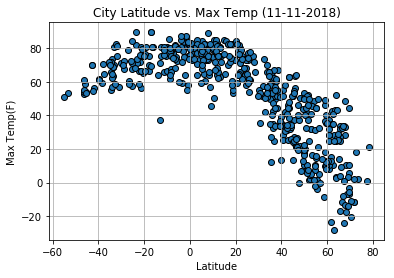

In [5]:

#Scatter plot with Lat and temp with edgedcolors
plt.scatter(latitude,temp,edgecolors="black")

#adding lables to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title(f"City Latitude vs. Max Temp ({todaysdate})")

#using grid and saving graph
plt.grid()
plt.savefig(f"City Latitude vs. Max Temp({todaysdate}).jpg")

#### Latitude vs. Humidity Plot

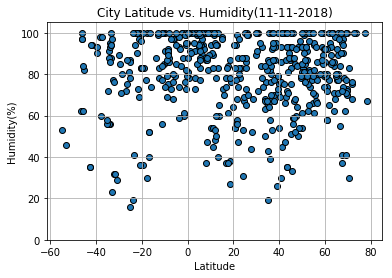

In [6]:
#Scatter plot with Lat and humidity with edgedcolors
plt.scatter(latitude,humidity,edgecolors="black")

#adding lables to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity({todaysdate})")
plt.grid()

#looked like there was a bad data set in the pull, went over 100%
plt.ylim(0,105)

#using grid and saving graph
plt.savefig(f"City Latitude vs. Humidity({todaysdate}).jpg")


#### Latitude vs. Cloudiness Plot

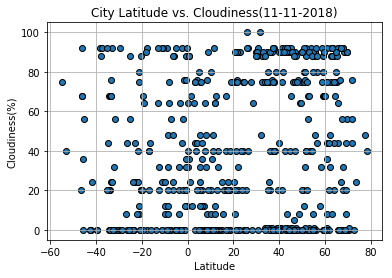

In [7]:
#Scatter plot with Lat and temp with edgedcolors
plt.scatter(latitude,cloudiness,edgecolors="black")

#adding lables to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness({todaysdate})")

#using grid and saving graph
plt.grid()
plt.savefig(f"City Latitude vs. Cloudiness({todaysdate}).jpg")

#### Latitude vs. Wind Speed Plot

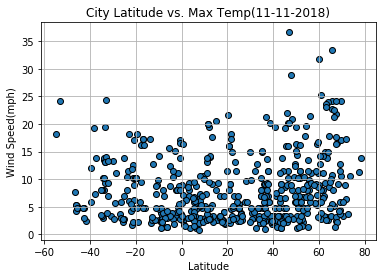

In [8]:
#Scatter plot with Lat and temp with edgedcolors
plt.scatter(latitude,wind,edgecolors="black")

#adding lables to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Max Temp({todaysdate})")

#using grid and saving graph
plt.grid()
plt.savefig(f"City Latitude vs. Max Temp({todaysdate}).jpg")